In [177]:
#Import packages
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
import seaborn

In [240]:
#Download the csv files
reddit = pd.read_csv('cleaned_reddit_data.csv')
daily = pd.read_csv('daily_sentiment.csv')


In [389]:
reddit.head(5)


,Unnamed: 0,body,score,created_utc,Stock,sentiment,date,month,day,weighted_sentiment
0,23,it can be if things go your way i held some co...,1.0,1.629139e+09,wish,0.8471,2021-08-16,8,16,0.8471
1,141,i bought a bunch of spy c and sold it at i wis...,1.0,1.629139e+09,wish,0.1655,2021-08-16,8,16,0.1655
2,181,they wish for bad things to happen sick sad pe...,1.0,1.629139e+09,wish,-0.8020,2021-08-16,8,16,-0.8020
3,202,y’all are crazy sometimes let’s wait for it to...,1.0,1.629139e+09,wish,0.1027,2021-08-16,8,16,0.1027
4,296,the charts have spoken they wish to fall,1.0,1.629138e+09,wish,0.4019,2021-08-16,8,16,0.4019


In [390]:
daily.head(5)


,Unnamed: 0,Stock,date,sentiment,weighted_sentiment
0,0,amc,2021-06-18,0.085691,0.565878
1,1,amc,2021-06-19,0.118995,0.970734
2,2,amc,2021-06-20,0.124279,2.070528
3,3,amc,2021-06-21,0.104410,0.927718
4,4,amc,2021-06-22,0.147129,1.660702


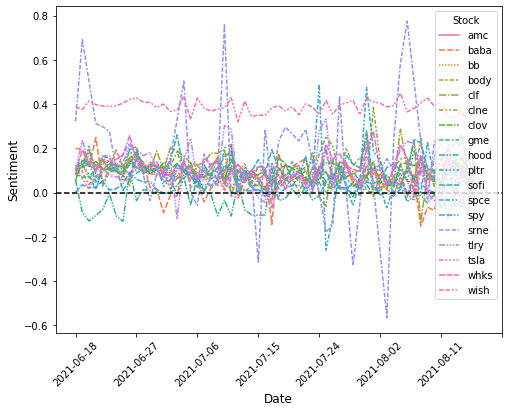

In [344]:
#Plot of all ticker codes 
fig, ax = pyplot.subplots(figsize=(8,6))
general_sentiment = sns.lineplot(ax = ax, data=daily, x="date", y="sentiment", style='Stock', hue='Stock')
#plt.ylim(-0.15, 0.22)
plt.xticks(np.arange(0, 70, step=9))
plt.xticks(rotation=45)
general_sentiment.axhline(0, ls='--', c='black')
ax.set_ylabel('Sentiment', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.show()


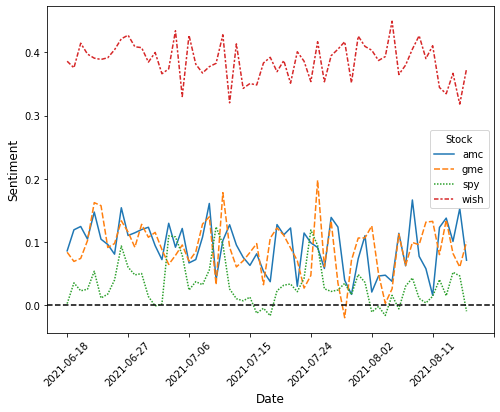

In [361]:
#Plot of the daily sentiment for wish, amc, gme and spy
daily_spec = daily.query('Stock==("wish","amc", "gme", "spy")')
fig, ax = pyplot.subplots(figsize=(8,6))
general_sentiment = sns.lineplot(ax = ax, data=daily_spec, x="date", y="sentiment", style='Stock', hue='Stock')
plt.xticks(np.arange(0, 70, step=9))
plt.xticks(rotation=45)
general_sentiment.axhline(0, ls='--', c='black')
ax.set_ylabel('Sentiment', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.savefig('daily_sentiment.png')

plt.show()


In [378]:
#Sort by popularity
popularity = reddit.groupby(by=['Stock','date'])['Stock'].count().reset_index(name='count')
popularity


,Stock,date,count
0,amc,2021-06-18,1282
1,amc,2021-06-19,658
2,amc,2021-06-20,427
3,amc,2021-06-21,822
4,amc,2021-06-22,940
...,...,...,...
1066,wish,2021-08-12,1166
1067,wish,2021-08-13,1766
1068,wish,2021-08-14,276
1069,wish,2021-08-15,224


In [385]:
#Sort by the total amount of mentions
popularity_count = reddit.groupby(by=['Stock'])['Stock'].count().reset_index(name='count')
popularity_count.sort_values(by='count',ascending=False)


,Stock,count
12,spy,52531
17,wish,34693
6,clov,25888
8,hood,22922
2,bb,22530
7,gme,21958
0,amc,20854
15,tsla,14934
3,body,12982
10,sofi,12380


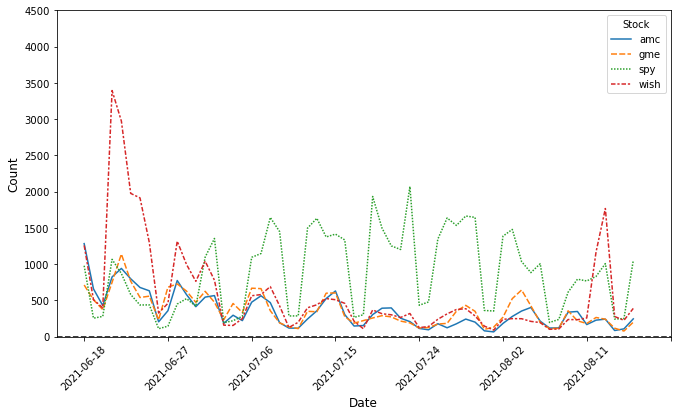

In [376]:
#Plot of the popularity for wish, amc, gme and spy
popularity_spec = popularity.query('Stock==("wish","amc", "gme", "spy")')
fig, ax = pyplot.subplots(figsize=(11,6))
Popularity_graph = sns.lineplot(ax = ax, data=popularity_spec, x="date", y="count", style='Stock', hue='Stock')
plt.ylim(0, 4500)
plt.xticks(np.arange(0, 70, step=9))
plt.xticks(rotation=45)
Popularity_graph.axhline(0, ls='--', c='black')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.savefig('popularity.png')

plt.show()


In [371]:
#Get n largest values for a given stock
max_value = popularity.query('Stock==("spy")').nlargest(5, ['count'])
max_value


,Stock,date,count
755,spy,2021-07-23,2070
751,spy,2021-07-19,1932
761,spy,2021-07-29,1663
762,spy,2021-07-30,1644
740,spy,2021-07-08,1643


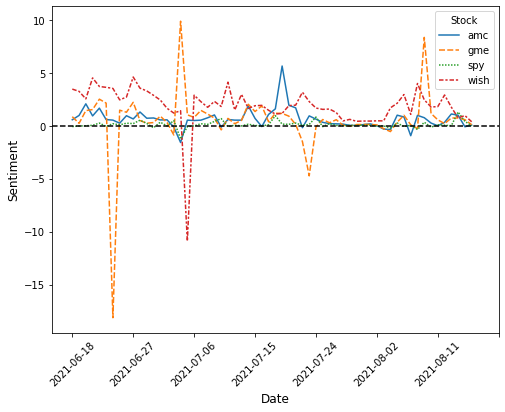

In [367]:
#Plot of the weighted sentiment for wish, amc, gme and spy
daily_spec = daily.query('Stock==("wish","amc", "gme", "spy")')
fig, ax = pyplot.subplots(figsize=(8,6))
weighted_sentiment = sns.lineplot(ax = ax, data=daily_spec, x="date", y="weighted_sentiment", style='Stock', hue='Stock')
plt.xticks(np.arange(0, 70, step=9))
plt.xticks(rotation=45)
weighted_sentiment.axhline(0, ls='--', c='black')
ax.set_ylabel('Sentiment', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.savefig('daily_weighted_sentiment.png')

plt.show()


In [368]:
#Get n largest values for a given stock
max_value_wei = daily_spec.query('Stock==("amc")').nlargest(5, ['weighted_sentiment'])
max_value_wei


,Unnamed: 0,Stock,date,sentiment,weighted_sentiment
31,31,amc,2021-07-19,0.127283,5.640649
2,2,amc,2021-06-20,0.124279,2.070528
32,32,amc,2021-07-20,0.111101,1.933078
26,26,amc,2021-07-14,0.075405,1.870940
33,33,amc,2021-07-21,0.121934,1.689579


In [337]:
#Get n smallest values for a given stock
max_value_wei = daily_spec.query('Stock==("gme")').nsmallest(5, ['weighted_sentiment'])
max_value_wei


,Unnamed: 0,Stock,date,sentiment,weighted_sentiment
426,426,gme,2021-06-24,0.090995,-18.135786
455,455,gme,2021-07-23,0.026632,-4.734774
454,454,gme,2021-07-22,0.070060,-1.497805
435,435,gme,2021-07-03,0.064064,-0.875581
467,467,gme,2021-08-04,0.002562,-0.554179


In [355]:
#Get n smallest values for a given stock
max_value_wei = daily_spec.query('Stock==("wish")').nsmallest(5, ['weighted_sentiment'])
max_value_wei

,Unnamed: 0,Stock,date,sentiment,weighted_sentiment
1028,1028,wish,2021-07-05,0.330238,-10.904675
1070,1070,wish,2021-08-16,0.373951,0.376318
1053,1053,wish,2021-07-30,0.351820,0.418697
1055,1055,wish,2021-08-01,0.409604,0.438871
1054,1054,wish,2021-07-31,0.425849,0.443901


In [249]:
#Sort by the total daily average for all ticker codes
average_daily = daily.groupby(by=['date'])['sentiment'].mean().reset_index()
average_daily

,date,sentiment
0,2021-06-18,0.122772
1,2021-06-19,0.159395
2,2021-06-20,0.114869
3,2021-06-21,0.111751
4,2021-06-22,0.128220
5,2021-06-23,0.129273
6,2021-06-24,0.113593
7,2021-06-25,0.098267
8,2021-06-26,0.154670
9,2021-06-27,0.155271


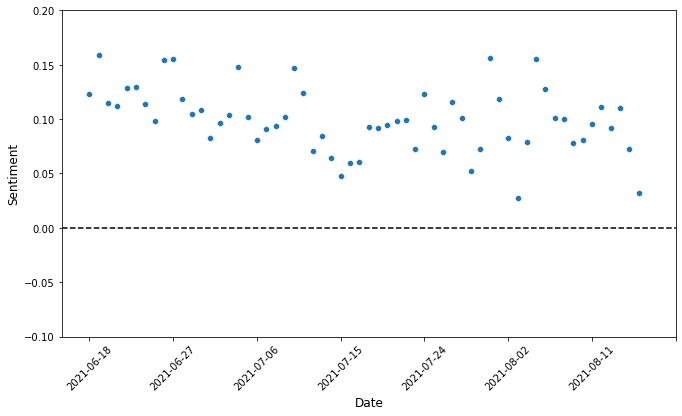

In [354]:
#Plot the total average for all ticker codes
fig, ax = pyplot.subplots(figsize=(11,6))
graph = sns.scatterplot(data=average_daily, x="date", y="sentiment")
plt.ylim(-0.1, 0.2)
plt.xticks(np.arange(0, 70, step=9))
plt.xticks(rotation=45)
graph.axhline(0, ls='--', c='black')
#ax.set_title("Average sentiment", fontsize=20, color='black')
ax.set_ylabel('Sentiment', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

plt.savefig('average_total_sentiment.png')

plt.show()

In [393]:
#Get the lowest 2 values
min_value_avg = average_daily.nsmallest(2, ['sentiment'])
min_value_avg

,date,sentiment
46,2021-08-03,0.027622
59,2021-08-16,0.032441


In [391]:
#Pivot chart
corr_chart = daily.drop(['Unnamed: 0','weighted_sentiment'],axis=1)
df_pivot = corr_chart.pivot('date','Stock','sentiment')
df_pivot.head(5)

Stock,amc,baba,bb,body,clf,clne,clov,gme,hood,pltr,sofi,spce,spy,srne,tlry,tsla,whks,wish
date,,,,,,,,,,,,,,,,,,
2021-06-18,0.085691,0.199487,0.111067,0.081622,0.096945,0.090283,0.053764,0.083423,0.056525,0.104754,0.117441,0.120395,0.002114,0.321940,0.098052,0.103344,0.096957,0.386083
2021-06-19,0.118995,0.194496,0.127230,0.093518,0.136115,0.097698,0.145622,0.068906,-0.090381,0.113361,0.141911,0.126257,0.034944,0.690800,0.237918,0.064025,0.192037,0.375656
2021-06-20,0.124279,0.117851,0.061295,0.034915,0.185809,0.193039,0.120270,0.073691,-0.128683,0.208192,0.138400,0.081032,0.022365,NaN,0.127600,0.017797,0.160260,0.414653
2021-06-21,0.104410,0.248106,0.094588,0.075508,0.118406,0.098626,0.140582,0.101780,-0.103427,0.081130,0.046085,0.012279,0.024867,0.312100,0.096056,0.066130,0.096847,0.397436
2021-06-22,0.147129,0.041922,0.133117,0.094327,0.150528,0.137078,0.109061,0.162079,-0.077903,0.029529,0.101922,0.104879,0.053314,0.297787,0.165401,0.113189,0.153607,0.390995


In [392]:
#Create correlation chart
corr_df = df_pivot.corr(method='pearson')
corr_df.head(5)

Stock,amc,baba,bb,body,clf,clne,clov,gme,hood,pltr,sofi,spce,spy,srne,tlry,tsla,whks,wish
Stock,,,,,,,,,,,,,,,,,,
amc,1.000000,-0.010194,0.340773,0.031723,-0.006448,0.336789,0.386822,0.344965,-0.178494,0.196072,-0.075839,0.133410,0.345455,0.074170,-0.035009,0.227124,0.302007,-0.191499
baba,-0.010194,1.000000,0.118336,0.059925,0.127478,-0.052978,0.202453,0.057007,-0.289405,0.250373,0.000517,0.202118,0.181072,0.214982,0.161557,0.096236,0.142291,0.210352
bb,0.340773,0.118336,1.000000,0.331435,0.061964,0.173109,0.395942,0.210068,0.093535,0.193137,0.073242,0.184204,0.235993,0.133659,0.266147,0.562790,0.282082,0.349821
body,0.031723,0.059925,0.331435,1.000000,0.095538,-0.187110,0.136451,0.122643,-0.016624,0.203592,0.064338,0.046396,0.195992,0.238251,0.245840,0.251924,0.038945,0.361136
clf,-0.006448,0.127478,0.061964,0.095538,1.000000,-0.119127,0.165664,-0.136668,-0.021843,0.296057,0.165381,0.250155,0.116852,0.410596,0.037135,-0.109502,0.068659,0.048295


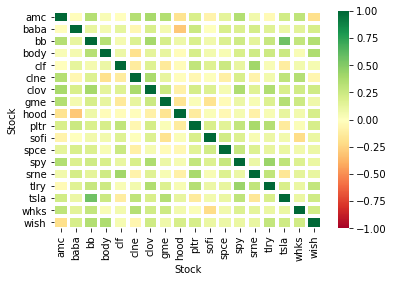

In [386]:
#Create heat map
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0, linewidths=2.5)

plt.savefig('correlation_heatmap.png')

plt.show()